In [1]:
#Loading All Needed Libraries

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Number Manupulation & Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection Libraries
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

#Preprocessing Libraries
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

#Liner Model Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#pipeline libraries
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import sklearn
import sklearn.decomposition

from sklearn.svm import SVC
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<font color=red size=6> Define Objective </font>

Predict the price of house
1. It is a regression problem
- Make a model which has highest R-square score on test dataset. 
- At the same time R-Score score on Train dataset should be such that it can be confidently accepted by the customer

<font color=red size=6> Understanding Dataset</font>

In [3]:
df_house = pd.read_csv("train.csv")

In [4]:
df_house.shape

(1460, 81)

In [5]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#Identify Fields which has more than 80% null values
f= list((df_house.isnull().sum() /len(df_house)*100) >45)
cols_45perNullVal = df_house.iloc[:,f].columns

print ("Dropping {} fields: {}".format( len(cols_45perNullVal), cols_45perNullVal))
df_house.drop(columns=cols_45perNullVal, inplace=True)

Dropping 5 fields: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [8]:
#Identify Fields which has any Null values
f= list((df_house.isnull().sum() /len(df_house)*100) >0)
#All Fields which has any Null values
cols_with_NullVal = df_house.iloc[:,f].columns
#Numeric Fields which has any Null values
cols_with_NullVal_num= df_house[cols_with_NullVal].select_dtypes(['int64','float64']).columns
#Categorical Fields which has any Null values
cols_with_NullVal_cat= df_house[cols_with_NullVal].select_dtypes("object").columns

##dtypes: float64(3), int64(35), object(43)
cols_all = df_house.columns

##All Categorical Fields in Dataset
cols_all_cat = df_house.select_dtypes("object").columns

##All Numerial Fields in Dataset
cols_all_num = df_house.select_dtypes( ['int64','float64']).columns

##All Numerial Fields in Dataset which has Ordinal Variable
cols_all_ord  = ['OverallQual', 'OverallCond', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath',\
                'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold','MSSubClass']

f= list((df_house[cols_all_ord].isnull().sum() /len(df_house)*100) >0)
#All Numeric Feilds with Ordinal Values which has Null Values
cols_with_NullVal_ord = df_house.iloc[:,f].columns

##All Categorical Fields in Dataset which has null values
cols_with_NonNullVal_cat = list(set(cols_all_cat).difference( set(cols_with_NullVal_cat) ) )

##All Numerial Fields in Dataset which has null values
cols_with_NonNullVal_num = list(set(cols_all_num).difference( set(cols_with_NullVal_num) ) )

##All Ordinal Fields in Dataset which has null values
cols_with_NonNullVal_ord = list(set(cols_all_ord).difference( set(cols_with_NullVal_ord) ) )


##All Pure Numerial Fields in Dataset
cols_num = list(set(cols_all_num).difference( set(cols_all_ord) ))

In [9]:
df_house[cols_num].describe()

,YearBuilt,SalePrice,GrLivArea,PoolArea,BsmtUnfSF,3SsnPorch,1stFlrSF,OpenPorchSF,LotArea,GarageArea,...,MasVnrArea,GarageYrBlt,BsmtFinSF1,LotFrontage,LowQualFinSF,TotalBsmtSF,Id,2ndFlrSF,YearRemodAdd,BsmtFinSF2
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1452.000000,1379.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,180921.195890,1515.463699,2.758904,567.240411,3.409589,1162.626712,46.660274,10516.828082,472.980137,...,103.685262,1978.506164,443.639726,70.049958,5.844521,1057.429452,730.500000,346.992466,1984.865753,46.549315
std,30.202904,79442.502883,525.480383,40.177307,441.866955,29.317331,386.587738,66.256028,9981.264932,213.804841,...,181.066207,24.689725,456.098091,24.284752,48.623081,438.705324,421.610009,436.528436,20.645407,161.319273
min,1872.000000,34900.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,1300.000000,0.000000,...,0.000000,1900.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,1950.000000,0.000000
25%,1954.000000,129975.000000,1129.500000,0.000000,223.000000,0.000000,882.000000,0.000000,7553.500000,334.500000,...,0.000000,1961.000000,0.000000,59.000000,0.000000,795.750000,365.750000,0.000000,1967.000000,0.000000
50%,1973.000000,163000.000000,1464.000000,0.000000,477.500000,0.000000,1087.000000,25.000000,9478.500000,480.000000,...,0.000000,1980.000000,383.500000,69.000000,0.000000,991.500000,730.500000,0.000000,1994.000000,0.000000
75%,2000.000000,214000.000000,1776.750000,0.000000,808.000000,0.000000,1391.250000,68.000000,11601.500000,576.000000,...,166.000000,2002.000000,712.250000,80.000000,0.000000,1298.250000,1095.250000,728.000000,2004.000000,0.000000
max,2010.000000,755000.000000,5642.000000,738.000000,2336.000000,508.000000,4692.000000,547.000000,215245.000000,1418.000000,...,1600.000000,2010.000000,5644.000000,313.000000,572.000000,6110.000000,1460.000000,2065.000000,2010.000000,1474.000000


<font color=red size=6>Check Null Values</fond>

In [10]:
(df_house.isnull().sum()/len(df_house)*100).sort_values()[::-1].head(15)

LotFrontage     17.739726
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
RoofStyle        0.000000
dtype: float64

In [11]:
##Null value percentage for Categorical Fields
(df_house.select_dtypes("object").isnull().sum() /len(df_house)*100).sort_values()[::-1].head(17)

GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
Electrical       0.068493
SaleCondition    0.000000
BldgType         0.000000
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
LandSlope        0.000000
dtype: float64

In [12]:
##check what kind of values are stored in catorical fields
cats = ((df_house.select_dtypes("object").isnull().sum() /len(df_house)*100).sort_values()[::-1].head(16)>0).index

for i in cats:
    print ( df_house[i].astype("category").value_counts() , "\n=====================================")

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64 
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 
Normal     1198
Par

In [13]:
##Null Value percentage for numeric fields
df=(df_house.select_dtypes(["int64","float64"]).isnull().sum() /len(df_house)*100).sort_values()[::-1].head(3)
df

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [14]:
df_house[df.index].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [15]:
df_house[cols_num].describe() #excluding ordinal value fields

,YearBuilt,SalePrice,GrLivArea,PoolArea,BsmtUnfSF,3SsnPorch,1stFlrSF,OpenPorchSF,LotArea,GarageArea,...,MasVnrArea,GarageYrBlt,BsmtFinSF1,LotFrontage,LowQualFinSF,TotalBsmtSF,Id,2ndFlrSF,YearRemodAdd,BsmtFinSF2
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1452.000000,1379.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,180921.195890,1515.463699,2.758904,567.240411,3.409589,1162.626712,46.660274,10516.828082,472.980137,...,103.685262,1978.506164,443.639726,70.049958,5.844521,1057.429452,730.500000,346.992466,1984.865753,46.549315
std,30.202904,79442.502883,525.480383,40.177307,441.866955,29.317331,386.587738,66.256028,9981.264932,213.804841,...,181.066207,24.689725,456.098091,24.284752,48.623081,438.705324,421.610009,436.528436,20.645407,161.319273
min,1872.000000,34900.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,1300.000000,0.000000,...,0.000000,1900.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,1950.000000,0.000000
25%,1954.000000,129975.000000,1129.500000,0.000000,223.000000,0.000000,882.000000,0.000000,7553.500000,334.500000,...,0.000000,1961.000000,0.000000,59.000000,0.000000,795.750000,365.750000,0.000000,1967.000000,0.000000
50%,1973.000000,163000.000000,1464.000000,0.000000,477.500000,0.000000,1087.000000,25.000000,9478.500000,480.000000,...,0.000000,1980.000000,383.500000,69.000000,0.000000,991.500000,730.500000,0.000000,1994.000000,0.000000
75%,2000.000000,214000.000000,1776.750000,0.000000,808.000000,0.000000,1391.250000,68.000000,11601.500000,576.000000,...,166.000000,2002.000000,712.250000,80.000000,0.000000,1298.250000,1095.250000,728.000000,2004.000000,0.000000
max,2010.000000,755000.000000,5642.000000,738.000000,2336.000000,508.000000,4692.000000,547.000000,215245.000000,1418.000000,...,1600.000000,2010.000000,5644.000000,313.000000,572.000000,6110.000000,1460.000000,2065.000000,2010.000000,1474.000000


<font color=red size=6>Check Data Imbalance</font>

<font color=red size=5> Categorical Variable Data Imbalance</fond>

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


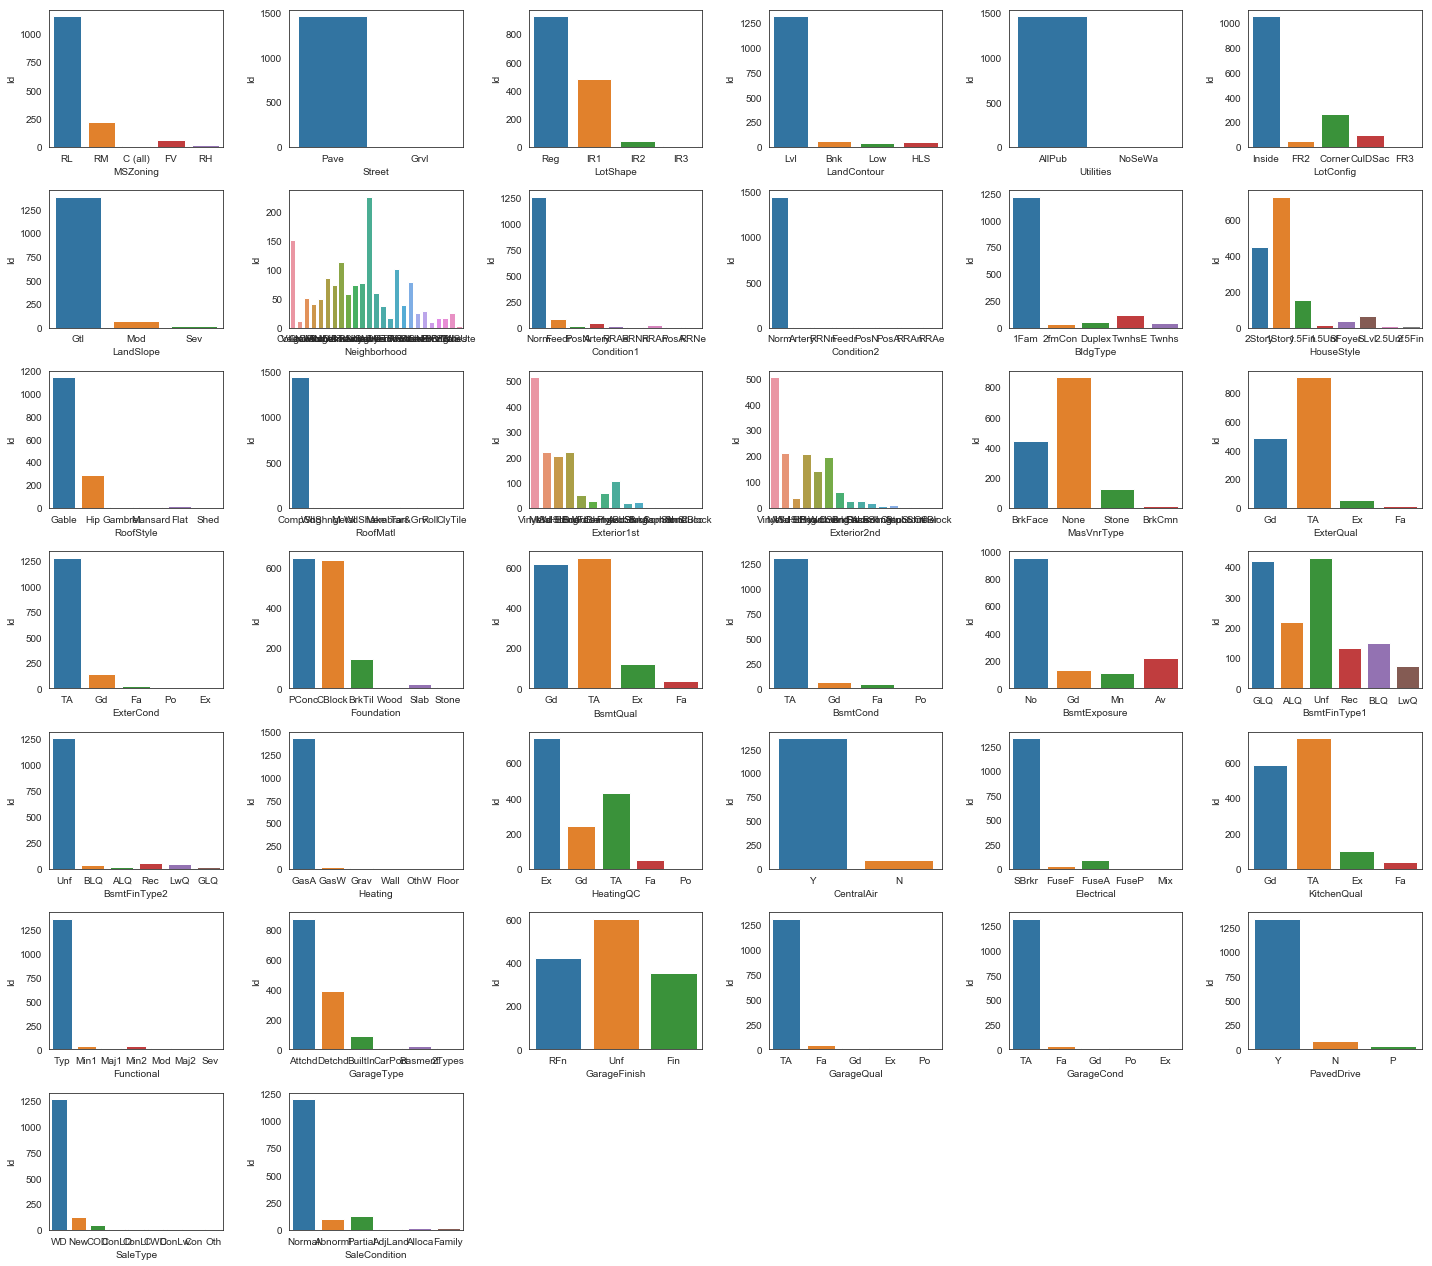

In [16]:
print (cols_all_cat)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_cat):
    plt.subplot(40,6,i)
    sns.barplot(y="Id", x=cols_all_cat[i-1], data=df_house, ci=0, estimator=len)
    i+=1
plt.tight_layout()

<font color=red size=5> Oridinal Variable Data Imbalance</font>

['OverallQual', 'OverallCond', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSSubClass']


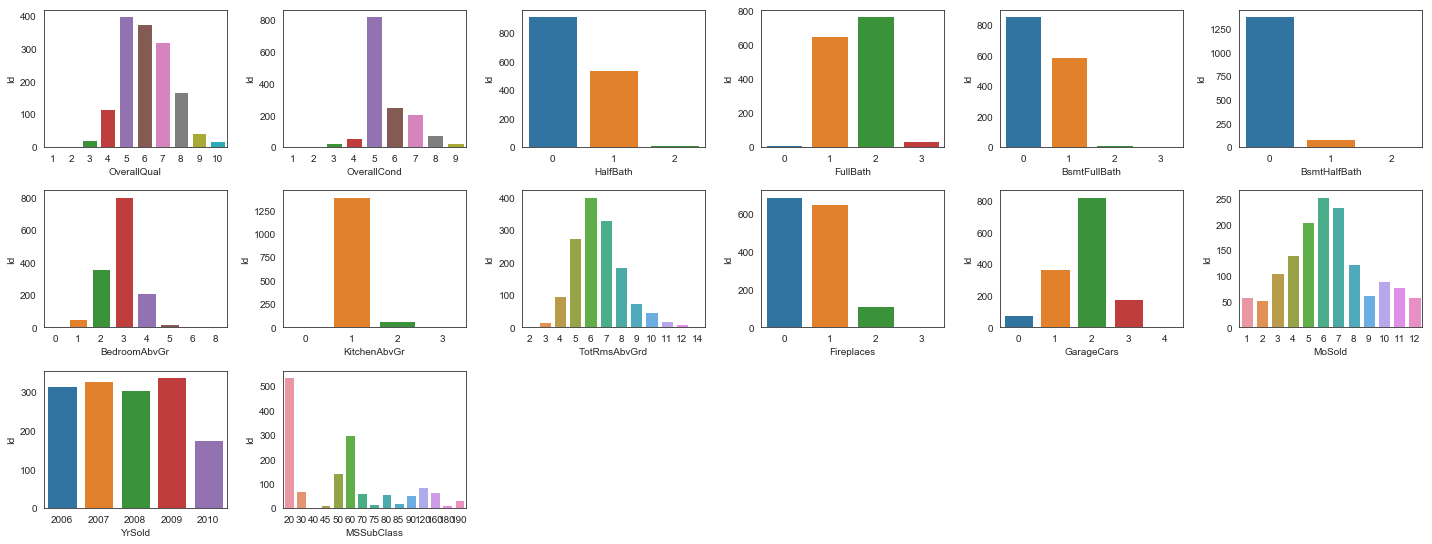

In [17]:
print (cols_all_ord)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_ord):
    plt.subplot(40,6,i)
    sns.barplot(y="Id", x=cols_all_ord[i-1], data=df_house, ci=0, estimator=len)
    i+=1
plt.tight_layout()

<font color=red size=5> Numerical Variable Data Distribution</font>

['YearBuilt', 'SalePrice', 'GrLivArea', 'PoolArea', 'BsmtUnfSF', '3SsnPorch', '1stFlrSF', 'OpenPorchSF', 'LotArea', 'GarageArea', 'EnclosedPorch', 'WoodDeckSF', 'ScreenPorch', 'MiscVal', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage', 'LowQualFinSF', 'TotalBsmtSF', 'Id', '2ndFlrSF', 'YearRemodAdd', 'BsmtFinSF2']


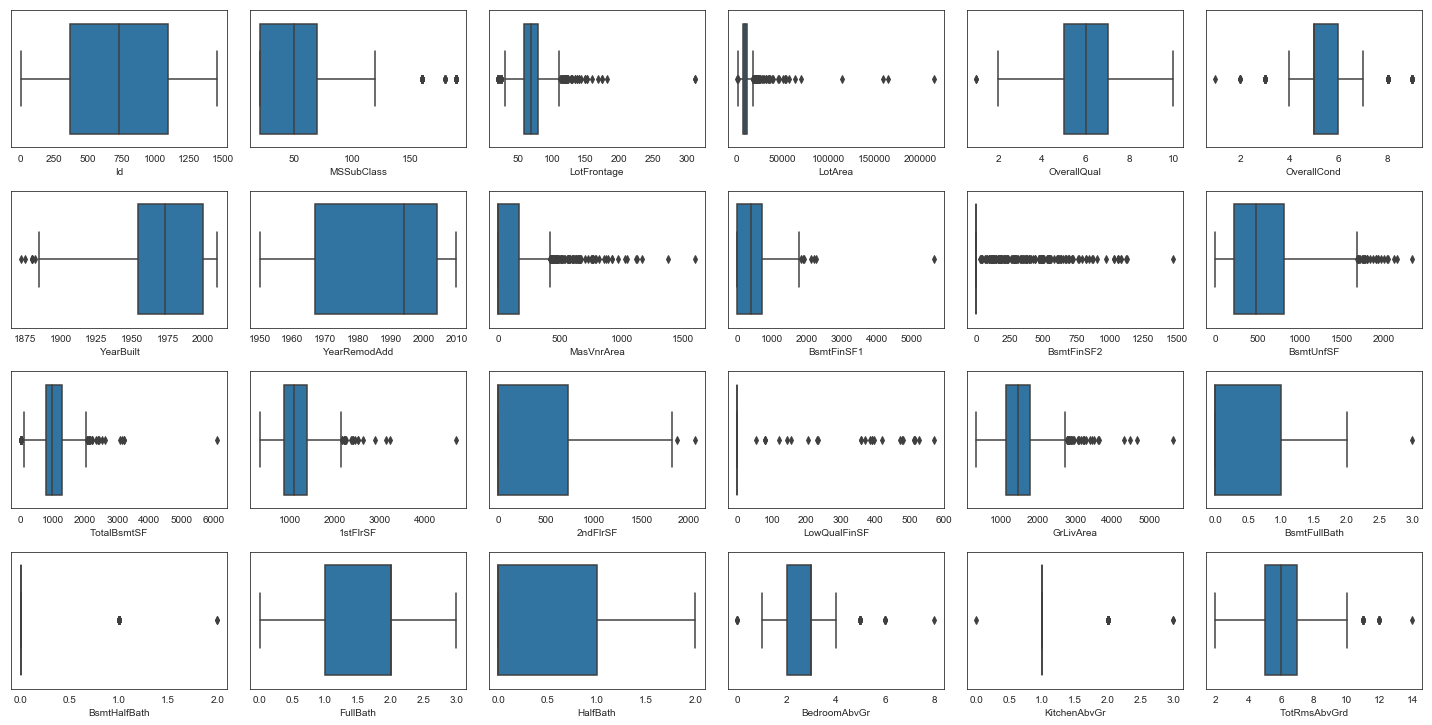

In [18]:
print (cols_num)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_num):
    plt.subplot(40,6,i)
    sns.boxplot( x=df_house[ cols_all_num[i-1] ])
    i+=1
plt.tight_layout()
plt.show()

<font color=red size=3> Feature Engigneering</font>

<font color=red size=3> Check Distribution Now</font>

<font color=red size=6>Imputing Null Values</font>

<font color=red size=5> Convert categorical variables into number</font>

We need to convert values in categorical variables in number for following reasons.
1. So that we can check relation between categorical variable and sales price. 
- So that we can do null value imputation using KNN. 
- So that we can do the modeling 

In [19]:
#df_house = df_house1.copy()

In [20]:
#If categorical variable has null value then it will assign 0 for that
#This function will return a categorical column with numeric values 
all_fldmap = pd.DataFrame()
 
def getValuesForCat(df, fld, hasNull=True, Print=True, fldmap_required=False):
    lst = list(df[fld].unique())

    if hasNull:
        lst.remove(np.nan)
        lst.insert(0,np.nan)
    if Print:
        print ("Field Name:" , fld)
        print ("Original=>",lst)
        print ("Numeric=>",np.array(range(len(lst))), "\n")

    if fldmap_required:
        fmap = pd.DataFrame( list( zip([fld]*len(lst),lst, np.array(range(len(lst))) ) ) )
        fmap.columns = ['Fname','Original','Numeric']
        
        global all_fldmap
        
        all_fldmap = pd.concat([all_fldmap,fmap])
        
    return df[fld].apply(lambda x: lst.index(x))
    

In [21]:
#Replace categorical field with number (This shall be done only for those columns which does not have any null value)
i=0
while i< len(cols_with_NonNullVal_cat):
    colname = cols_with_NonNullVal_cat[i]
    df_house[colname]  = getValuesForCat(df=df_house, fld=colname,hasNull=False, Print=True,fldmap_required=True)
    i+=1 
print ("Processing Done")
#print (cols_with_NonNullVal_cat)

Field Name: LotConfig
Original=> ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Numeric=> [0 1 2 3 4] 

Field Name: ExterCond
Original=> ['TA', 'Gd', 'Fa', 'Po', 'Ex']
Numeric=> [0 1 2 3 4] 

Field Name: Condition1
Original=> ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Numeric=> [0 1 2 3 4 5 6 7 8] 

Field Name: BldgType
Original=> ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
Numeric=> [0 1 2 3 4] 

Field Name: LandSlope
Original=> ['Gtl', 'Mod', 'Sev']
Numeric=> [0 1 2] 

Field Name: LotShape
Original=> ['Reg', 'IR1', 'IR2', 'IR3']
Numeric=> [0 1 2 3] 

Field Name: Foundation
Original=> ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone']
Numeric=> [0 1 2 3 4 5] 

Field Name: KitchenQual
Original=> ['Gd', 'TA', 'Ex', 'Fa']
Numeric=> [0 1 2 3] 

Field Name: RoofMatl
Original=> ['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile']
Numeric=> [0 1 2 3 4 5 6 7] 

Field Name: CentralAir
Original=> ['Y', 'N']
Numeric=> [0 1] 


In [22]:
#Impute Null Categorical Values
def imputeNull_CatValues(df,fld,fldmap_required=False):
    # Get customed hotencoded categories for a given field, 
    # create a new field in main dataframe and assign this to that field    
    df[fld] = getValuesForCat(df=df_with_null, fld=fld, hasNull=True, Print=True, fldmap_required=fldmap_required)

    #create train dataset from main dataframe, it includes only non null rows of the given field
    #(in hotencoding process null is converted to 0)
    col =cols.copy()
    
    #create test dataset from main dataframe, it includes all the rows.
    X_test = df[col]
    
    col.append(fld)
    #training using null null columns
    df_train = df[col] [ df[fld]!=0]  

    #supplied fld in dataframe need to be classified. So we need to train using this field
    y_train= df_train[fld]
    X_train = df_train.drop(columns=fld)
    clusters = len(y_train.unique())

    #Training the model on the train data
    #from sklearn.linear_model import LogisticRegression
   
    #lr = LogisticRegression(max_iter=150)
    #lm = lr.fit(X_train,y_train)

    #predict using train data
    #pred_train_clusterid = lm.predict(X_train)

    #predict using test data
    #pred_test_clusterid = lm.predict(X_test)
    
    #KNeighborsClassifier is working better than above LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    km = KNeighborsClassifier(n_neighbors=clusters)
    km.fit(X_train,y_train)
    pred_train_clusterid = km.predict(X_train)
    pred_test_clusterid = km.predict(X_test)
    
    print ("Accuracy on Train Dataset :",
    round(metrics.accuracy_score(y_train, pred_train_clusterid),2))
    print ("==========================================")
    
    df1 = pd.DataFrame( {"prediction":pred_test_clusterid, "actual":df[fld]})
    
    #create a need field in temp dataframe df1, 
    #for a given field if actual==0 (it has null value) then use prediction to replace
    df1.loc[ df1["actual"]==0,fld] = df1["prediction"]
    
    #If actual is not null then we should not use predicted cluster value, so use actual value
    df1.loc[ df1["actual"]!=0,fld] = df1["actual"]
    
    #ensure filed is integer
    df1[fld] = df1[fld].apply(int)
    
    #replace this column from temp df1 to main dataframe df
    df[fld] = df1[fld]
    
    #With this all null values for given field in the dataframe has been replace with the predicted value
    
    return

In [23]:
all_fldmap.shape
#df_house=df_house1.copy()

(182, 3)

In [24]:
## List of All Non Null columns which can be used to create cluster and then Null Value Imputation
cols = cols_with_NonNullVal_cat + cols_with_NonNullVal_num

## This steps impute null values only in Categorical Fields
df_with_null = df_house[cols_with_NullVal_cat]
for colname in cols_with_NullVal_cat:
    imputeNull_CatValues(df_house,colname,fldmap_required=True)

Field Name: MasVnrType
Original=> [nan, 'BrkFace', 'None', 'Stone', 'BrkCmn']
Numeric=> [0 1 2 3 4] 

Accuracy on Train Dataset : 0.74
Field Name: BsmtQual
Original=> [nan, 'Gd', 'TA', 'Ex', 'Fa']
Numeric=> [0 1 2 3 4] 

Accuracy on Train Dataset : 0.79
Field Name: BsmtCond
Original=> [nan, 'TA', 'Gd', 'Fa', 'Po']
Numeric=> [0 1 2 3 4] 

Accuracy on Train Dataset : 0.92
Field Name: BsmtExposure
Original=> [nan, 'No', 'Gd', 'Mn', 'Av']
Numeric=> [0 1 2 3 4] 

Accuracy on Train Dataset : 0.74
Field Name: BsmtFinType1
Original=> [nan, 'GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ']
Numeric=> [0 1 2 3 4 5 6] 

Accuracy on Train Dataset : 0.57
Field Name: BsmtFinType2
Original=> [nan, 'Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ']
Numeric=> [0 1 2 3 4 5 6] 

Accuracy on Train Dataset : 0.88
Field Name: Electrical
Original=> [nan, 'SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix']
Numeric=> [0 1 2 3 4 5] 

Accuracy on Train Dataset : 0.91
Field Name: GarageType
Original=> [nan, 'Attchd', 'Detchd', 'BuiltIn', '

In [25]:
all_fldmap.shape

(245, 3)

In [26]:
#Impute Numeric Values
print ("Imputing Numeric Cols of Null Values with Mean")

for colname in cols_with_NullVal_num:
    val = round(df_house[colname].mean(),1)
    print (colname, " imputed with ", val)
    df_house[colname] [ df_house[colname].isna() ]  = val

Imputing Numeric Cols of Null Values with Mean
LotFrontage  imputed with  70.0
MasVnrArea  imputed with  103.7
GarageYrBlt  imputed with  1978.5


In [27]:
#Impute Numeric Values
print ("Imputing Numeric (Ordinal Value) Cols with Null Values with Median")

for colname in cols_with_NullVal_ord:
    val= df_house[colname].median()
    print (colname, " imputed with ", val)
    df_house[colname] [ df_house[colname].isna() ]  = val

Imputing Numeric (Ordinal Value) Cols with Null Values with Median


In [28]:
#Check Null Values
(df_house.isnull().sum()/len(df_house)*100).sort_values()[::-1].head(10)

SalePrice      0.0
ExterCond      0.0
RoofStyle      0.0
RoofMatl       0.0
Exterior1st    0.0
Exterior2nd    0.0
MasVnrType     0.0
MasVnrArea     0.0
ExterQual      0.0
Foundation     0.0
dtype: float64

<font color=red size=6> Visualising Relationship between y & X</font>

__Normalise Distribution of Target Varable__

In [85]:
df_house=df_house1.copy()

In [86]:
df_house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

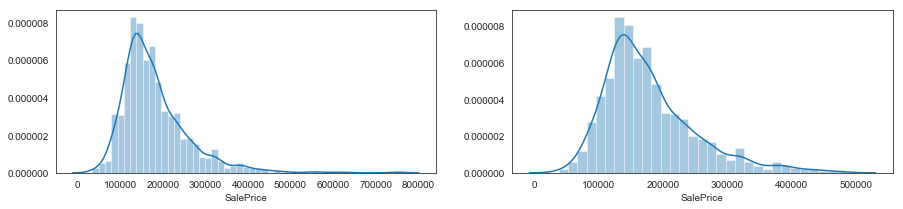

In [87]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df_house.SalePrice)
plt.subplot(1,2,2)
sns.distplot( df_house[ (df_house.SalePrice<=500000) & (df_house.SalePrice>36000) ].SalePrice )
plt.show()

In [88]:
print ("# of outlier Records",len(df_house[  ~ ((df_house.SalePrice<=500000) & (df_house.SalePrice>=60000)) ]) )
#Removing Outliers
df_house = df_house[   ((df_house.SalePrice<=500000) & (df_house.SalePrice>=60000)) ]

# of outlier Records 20


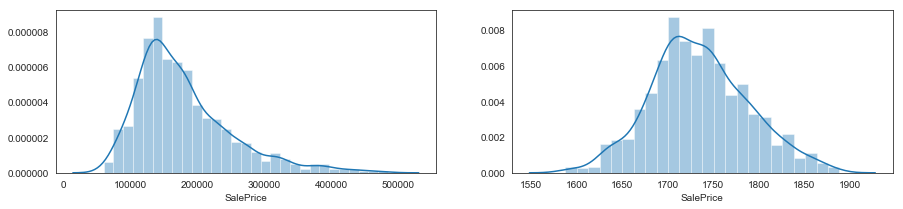

In [89]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df_house.SalePrice)
plt.subplot(1,2,2)
sns.distplot(np.log2(df_house.SalePrice)*100)
plt.show()

In [90]:
#Scale Target Variable
df_house.SalePrice = df_house.SalePrice * 100

<font color=red size=5>Check SalesPrice & Cateorical Variable Relationship</font>

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


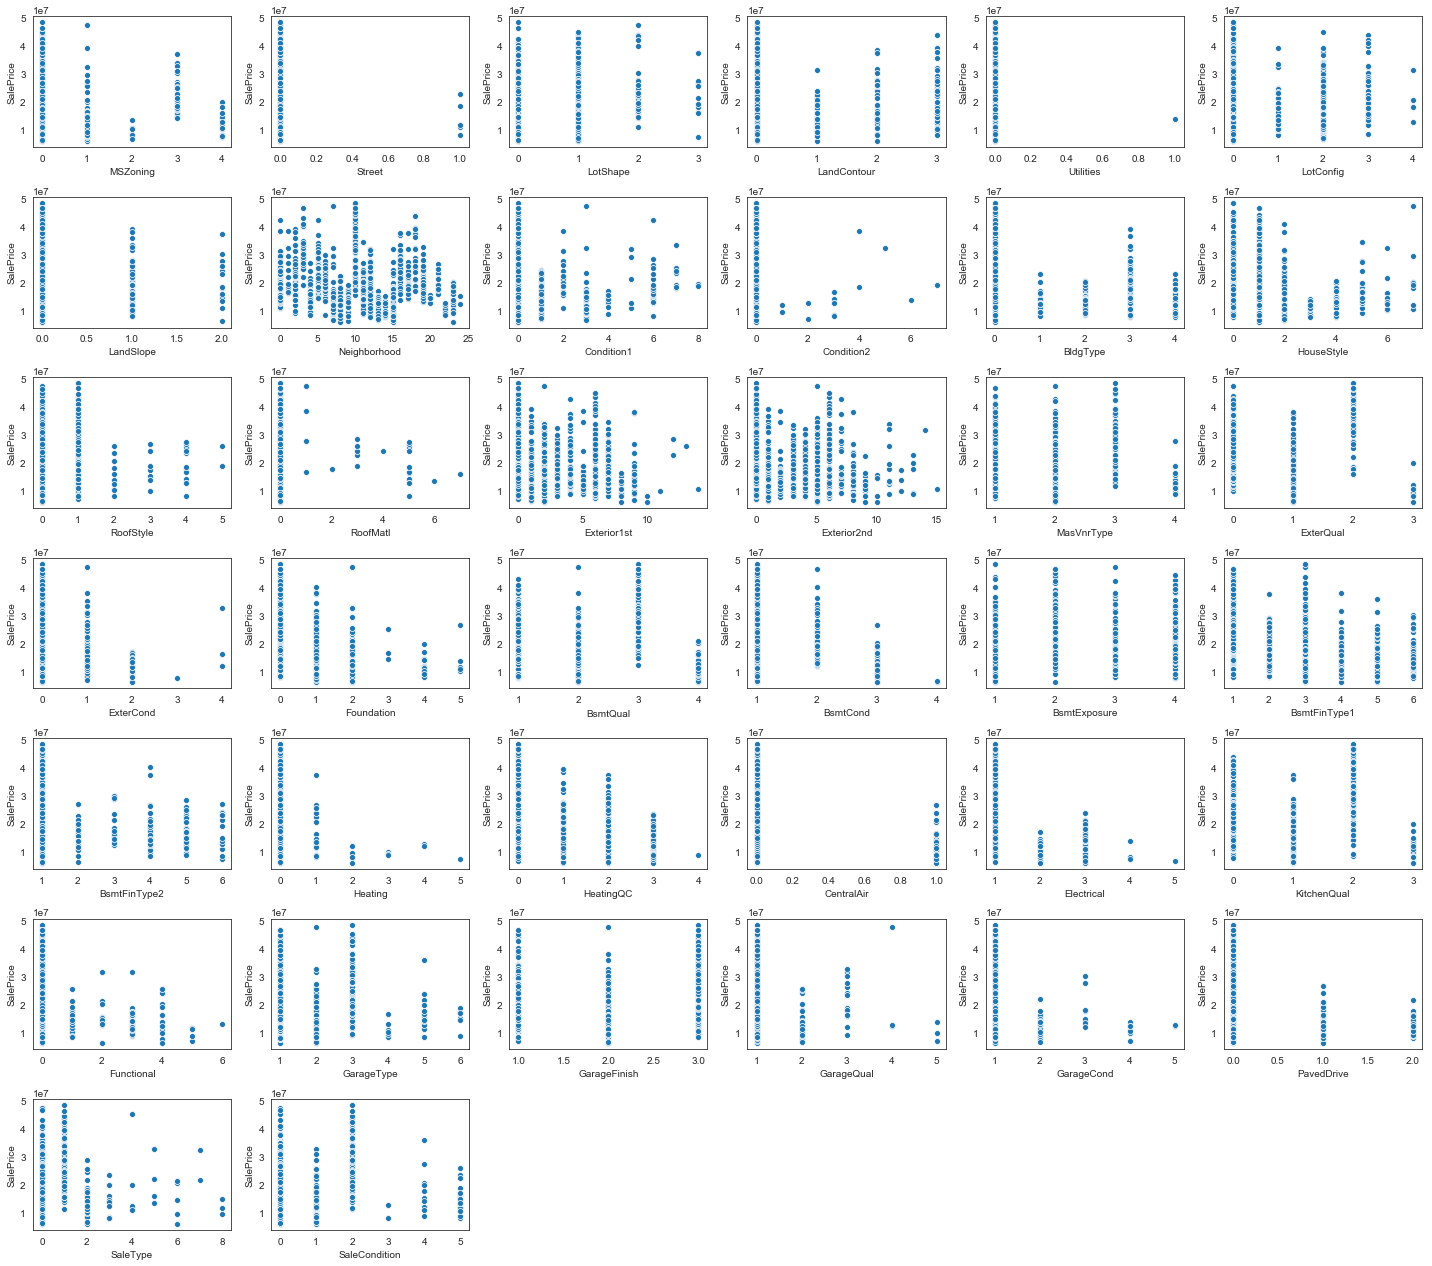

In [91]:
print (cols_all_cat)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_cat):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df_house.SalePrice, x=cols_all_cat[i-1], data=df_house)
    i+=1
plt.tight_layout()

<font color=red size=5>Check SalesPrice & Ordinal Variable Relationship</font>

['OverallQual', 'OverallCond', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSSubClass']


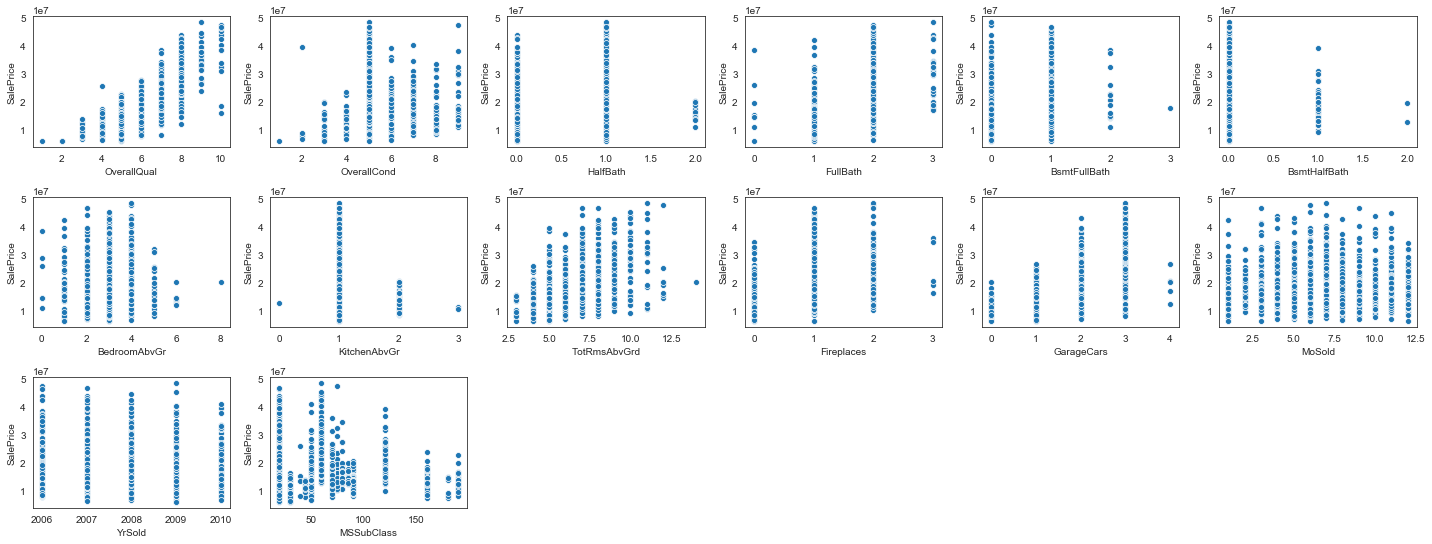

In [92]:
print (cols_all_ord)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_ord):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df_house.SalePrice, x=cols_all_ord[i-1], data=df_house)
    i+=1
plt.tight_layout()

<font color=red size=5> Check SalesPrice & Numeric Variable Relationship</font>

['YearBuilt', 'SalePrice', 'GrLivArea', 'PoolArea', 'BsmtUnfSF', '3SsnPorch', '1stFlrSF', 'OpenPorchSF', 'LotArea', 'GarageArea', 'EnclosedPorch', 'WoodDeckSF', 'ScreenPorch', 'MiscVal', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage', 'LowQualFinSF', 'TotalBsmtSF', 'Id', '2ndFlrSF', 'YearRemodAdd', 'BsmtFinSF2']


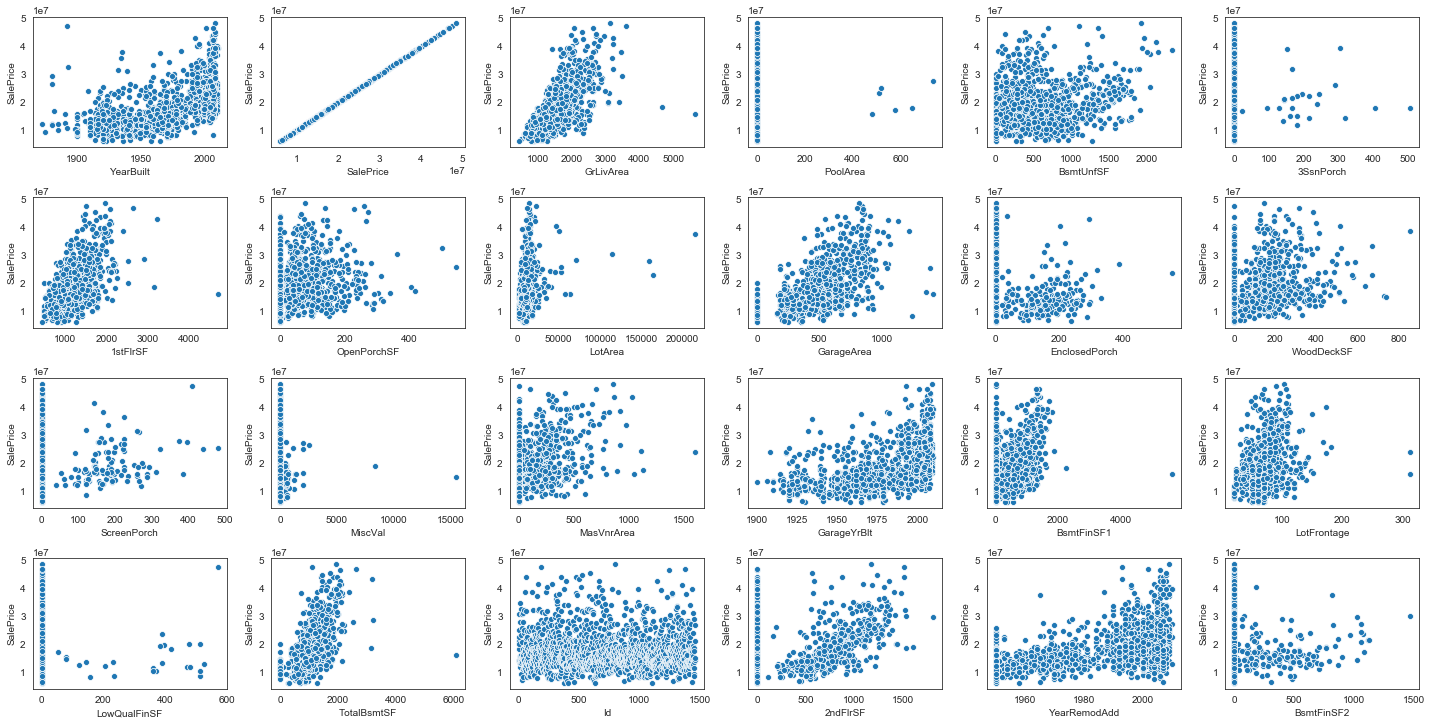

In [93]:
print (cols_num)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_num):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df_house.SalePrice, x=cols_num[i-1], data=df_house)
    i+=1
plt.tight_layout()

#All fields looks have liner relationship. So no transformation is required for any field.

<font color=red size=5> Check Degree of Correlation between SalesPrice & Numeric Variable</font>

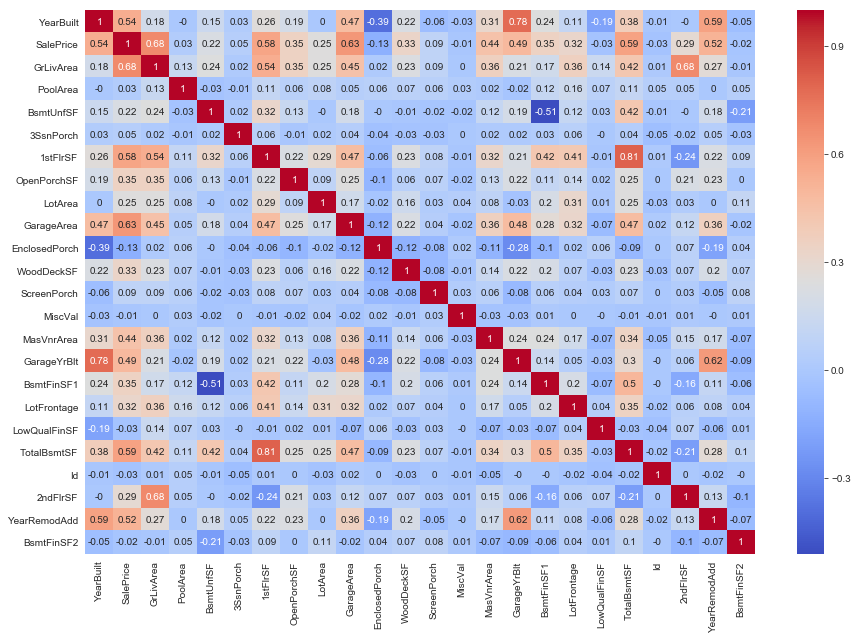

In [94]:
df_corr = np.round(df_house[cols_num].corr(),2)
sns.set_style("white")
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

In [95]:
df_corr

,YearBuilt,SalePrice,GrLivArea,PoolArea,BsmtUnfSF,3SsnPorch,1stFlrSF,OpenPorchSF,LotArea,GarageArea,...,MasVnrArea,GarageYrBlt,BsmtFinSF1,LotFrontage,LowQualFinSF,TotalBsmtSF,Id,2ndFlrSF,YearRemodAdd,BsmtFinSF2
YearBuilt,1.00,0.54,0.18,-0.00,0.15,0.03,0.26,0.19,0.00,0.47,...,0.31,0.78,0.24,0.11,-0.19,0.38,-0.01,-0.00,0.59,-0.05
SalePrice,0.54,1.00,0.68,0.03,0.22,0.05,0.58,0.35,0.25,0.63,...,0.44,0.49,0.35,0.32,-0.03,0.59,-0.03,0.29,0.52,-0.02
GrLivArea,0.18,0.68,1.00,0.13,0.24,0.02,0.54,0.35,0.25,0.45,...,0.36,0.21,0.17,0.36,0.14,0.42,0.01,0.68,0.27,-0.01
PoolArea,-0.00,0.03,0.13,1.00,-0.03,-0.01,0.11,0.06,0.08,0.05,...,0.02,-0.02,0.12,0.16,0.07,0.11,0.05,0.05,0.00,0.05
BsmtUnfSF,0.15,0.22,0.24,-0.03,1.00,0.02,0.32,0.13,-0.00,0.18,...,0.12,0.19,-0.51,0.12,0.03,0.42,-0.01,-0.00,0.18,-0.21
3SsnPorch,0.03,0.05,0.02,-0.01,0.02,1.00,0.06,-0.01,0.02,0.04,...,0.02,0.02,0.03,0.06,-0.00,0.04,-0.05,-0.02,0.05,-0.03
1stFlrSF,0.26,0.58,0.54,0.11,0.32,0.06,1.00,0.22,0.29,0.47,...,0.32,0.21,0.42,0.41,-0.01,0.81,0.01,-0.24,0.22,0.09
OpenPorchSF,0.19,0.35,0.35,0.06,0.13,-0.01,0.22,1.00,0.09,0.25,...,0.13,0.22,0.11,0.14,0.02,0.25,0.00,0.21,0.23,0.00
LotArea,0.00,0.25,0.25,0.08,-0.00,0.02,0.29,0.09,1.00,0.17,...,0.08,-0.03,0.20,0.31,0.01,0.25,-0.03,0.03,0.00,0.11
GarageArea,0.47,0.63,0.45,0.05,0.18,0.04,0.47,0.25,0.17,1.00,...,0.36,0.48,0.28,0.32,-0.07,0.47,0.02,0.12,0.36,-0.02


<font color=red size=5> Create Dummy Fields, Split Dataset & Scale Numeric Fields</font>

In [96]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,20850000
1,2,20,0,80.0,9600,0,0,0,0,1,...,0,0,0,0,0,5,2007,0,0,18150000
2,3,60,0,68.0,11250,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,22350000
3,4,70,0,60.0,9550,0,1,0,0,2,...,272,0,0,0,0,2,2006,0,1,14000000
4,5,60,0,84.0,14260,0,1,0,0,1,...,0,0,0,0,0,12,2008,0,0,25000000


In [97]:
#Create dummy fields for all cateorical variables
for colname in cols_all_cat:
    temp = pd.get_dummies( df_house[colname], prefix=colname, drop_first=True)
    df_house.drop(columns=colname, inplace=True)
    df_house = pd.concat([df_house, temp], axis=1)

In [98]:
#Split Dataset in X & y
Xcols = list(df_house.columns)
Xcols.remove("SalePrice")

X = df_house[Xcols]
y= df_house.SalePrice

In [99]:
# split X, y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
X_train_id = X_train.Id
X_test_id = X_test.Id

X_train = X_train.drop(columns="Id")
X_test = X_test.drop(columns="Id")

In [100]:
#y_train.head()

In [101]:
# scaling the numeric feature features in train and test
from sklearn.preprocessing import StandardScaler

cols_scale = cols_num.copy()

cols_scale.remove("Id")
cols_scale.remove("SalePrice")

sc = StandardScaler()
X_train[cols_scale] =pd.DataFrame( sc.fit_transform( X_train[cols_scale] ), index=X_train.index )
X_test[cols_scale]  =pd.DataFrame( sc.transform( X_test[cols_scale] ) , index=X_test.index)

In [102]:
df_house.to_csv("clean_train_data.csv")

### PCA Compression

In [156]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver="randomized",random_state=100)
pca_scaled = pca.fit_transform(X,y)
pca_scaled = pd.DataFrame(pca_scaled)
pca_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
0,-2021.626552,-26.447447,-279.370727,728.369710,-117.239402,-755.225186,-167.675949,-65.365454,43.135557,4.634204,...,0.005184,0.000120,0.001331,0.001291,-0.000820,0.001000,-0.001388,-1.268970e-11,-2.212266e-12,3.150793e-12
1,-867.331850,-23.472721,746.176879,204.375406,-34.513814,-733.895218,-58.387084,50.300680,-52.271327,-121.781032,...,-0.014141,0.006912,-0.003498,-0.002711,0.015939,0.000884,0.000125,-8.071118e-12,-5.078896e-12,9.629580e-12
2,778.132528,64.474341,-470.105018,412.244294,-88.597612,-740.414369,-157.463841,-87.287167,59.487882,-44.994247,...,0.005164,0.002693,0.000669,0.003117,-0.002334,0.000029,-0.002991,1.529742e-11,5.396605e-14,3.744243e-12
3,-926.414955,-65.856838,-580.965244,172.967886,-63.502759,-725.028886,26.301148,-120.257532,12.445610,-192.078590,...,0.019675,0.016456,0.014910,0.005027,-0.000755,-0.002856,-0.008779,-1.388171e-11,2.665926e-12,-3.892536e-12
4,3800.776090,613.680084,-534.926965,571.437035,-101.761260,-744.718268,-167.772781,-244.547345,139.880973,5.708614,...,0.008392,0.008263,-0.004990,0.003168,-0.002229,0.000999,-0.000023,-2.415656e-11,2.683897e-12,-6.470421e-12


In [157]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#Only one PCA feature can explain 98.31% of variance

array([98.34, 98.8 , 99.14, 99.42, 99.66, 99.84, 99.89, 99.92, 99.95,
       99.97, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98,

In [158]:
pca_scaled = pca_scaled[[0,1]]
pca_scaled.columns = ["PCA1","PCA2"]

### PCA Feature Engineering

In [159]:
print (len(pca_scaled[pca_scaled.PCA1<70000]), len(pca_scaled[pca_scaled.PCA1>70000]) )

1436 4


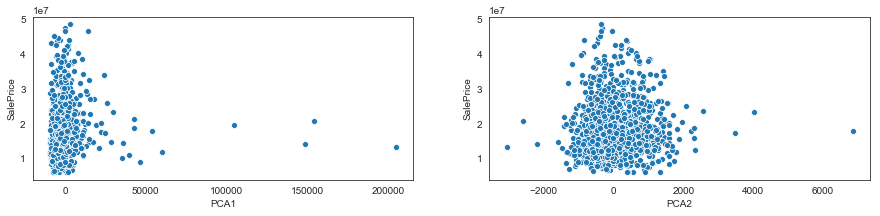

In [161]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.scatterplot(pca_scaled.PCA1, y)
plt.subplot(1,2,2)
sns.scatterplot(pca_scaled.PCA2, y)
plt.show()

In [162]:
#After Removing Outlier
pca_scaled = pca_scaled[pca_scaled.PCA1<70000]

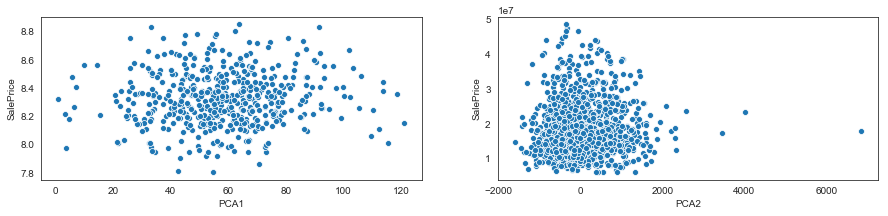

In [163]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.scatterplot( np.log(pca_scaled.PCA1)**2, np.log(np.sqrt(y)) )
plt.subplot(1,2,2)
sns.scatterplot(pca_scaled.PCA2, y)
plt.show()

<font color=red size=5>__Start Modeling__</font>